In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.1.3
2.5


In [3]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [4]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [5]:
planning_steps

array([0, 1, 2])

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [7]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132)
RealParameter('A.1_Bmax', 30, 350)
RealParameter('A.1_pfail', 0, 1)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350)
RealParameter('A.2_pfail', 0, 1)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350)
RealParameter('A.3_pfail', 0, 1)
CategoricalParameter('A.3_Brate', [0, 1, 2])
RealParameter('A.4_Bmax', 30, 350)
RealParameter('A.4_pfail', 0, 1)
CategoricalParameter('A.4_Brate', [0, 1, 2])
RealParameter('A.5_Bmax', 30, 350)
RealParameter('A.5_pfail', 0, 1)
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [8]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1)
IntegerParameter('0_RfR 1', 0, 1)
IntegerParameter('0_RfR 2', 0, 1)
IntegerParameter('1_RfR 0', 0, 1)
IntegerParameter('1_RfR 1', 0, 1)
IntegerParameter('1_RfR 2', 0, 1)
IntegerParameter('2_RfR 0', 0, 1)
IntegerParameter('2_RfR 1', 0, 1)
IntegerParameter('2_RfR 2', 0, 1)
IntegerParameter('3_RfR 0', 0, 1)
IntegerParameter('3_RfR 1', 0, 1)
IntegerParameter('3_RfR 2', 0, 1)
IntegerParameter('4_RfR 0', 0, 1)
IntegerParameter('4_RfR 1', 0, 1)
IntegerParameter('4_RfR 2', 0, 1)
IntegerParameter('EWS_DaysToThreat', 0, 4)
IntegerParameter('A.1_DikeIncrease 0', 0, 10)
IntegerParameter('A.1_DikeIncrease 1', 0, 10)
IntegerParameter('A.1_DikeIncrease 2', 0, 10)
IntegerParameter('A.2_DikeIncrease 0', 0, 10)
IntegerParameter('A.2_DikeIncrease 1', 0, 10)
IntegerParameter('A.2_DikeIncrease 2', 0, 10)
IntegerParameter('A.3_DikeIncrease 0', 0, 10)
IntegerParameter('A.3_DikeIncrease 1', 0, 10)
IntegerParameter('A.3_DikeIncrease 2', 0, 10)
IntegerParameter('A.4_DikeIncreas

In [9]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage 2', variable_name=['A.1_Expected Annual Damage 2', 'A.2_Expected Annual Damage 2', 'A.3_Expected Annual Damage 2', 'A.4_Expected Annual Damage 2', 'A.5_Expected Annual Damage 2'], function=<function sum_over at 0x0000014703BCE0D0>)
ScalarOutcome('Dike Investment Costs 2', variable_name=['A.1_Dike Investment Costs 2', 'A.2_Dike Investment Costs 2', 'A.3_Dike Investment Costs 2', 'A.4_Dike Investment Costs 2', 'A.5_Dike Investment Costs 2'], function=<function sum_over at 0x0000014703BCE0D0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x0000014703BCE0D0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=['A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'], function=<function sum_over at 0x0000014703BCE0D0>)
ScalarOutcome('A.3_Expecte

In [12]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100, policies=4)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [15]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage 2', 'Dike Investment Costs 2', 'A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,95.0,140.725001,1,0.078473,53.889440,1.5,0.265571,64.470664,1.5,0.052964,...,0.0,5.0,10.0,6.0,8.0,8.0,2.0,100,4,dikesnet
1,114.0,86.906264,1.5,0.881037,134.544899,10,0.798096,285.650256,10,0.369066,...,0.0,5.0,10.0,6.0,8.0,8.0,2.0,101,4,dikesnet
2,66.0,339.307285,1,0.555376,64.920284,10,0.141091,167.584278,10,0.707876,...,0.0,5.0,10.0,6.0,8.0,8.0,2.0,102,4,dikesnet
3,50.0,121.039115,1.5,0.968711,121.973425,1,0.786418,30.396466,10,0.587585,...,0.0,5.0,10.0,6.0,8.0,8.0,2.0,103,4,dikesnet
4,81.0,149.565408,1.5,0.599806,344.099722,1,0.623804,315.694253,1.5,0.381501,...,0.0,5.0,10.0,6.0,8.0,8.0,2.0,104,4,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,189.536924,10,0.103344,212.559435,10,0.505880,348.281492,1.5,0.797058,...,8.0,8.0,7.0,9.0,6.0,6.0,1.0,195,7,dikesnet
396,108.0,346.821996,1,0.982413,200.196399,1.5,0.292645,95.003752,1,0.430759,...,8.0,8.0,7.0,9.0,6.0,6.0,1.0,196,7,dikesnet
397,12.0,268.097763,1,0.484333,320.764901,1,0.080480,262.167321,1,0.012814,...,8.0,8.0,7.0,9.0,6.0,6.0,1.0,197,7,dikesnet
398,46.0,223.645254,1,0.365684,216.134441,1.5,0.070190,337.479208,1,0.893969,...,8.0,8.0,7.0,9.0,6.0,6.0,1.0,198,7,dikesnet


In [46]:
policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3 Total Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

C:\Users\archipel-03\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\archipel-03\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\archipel-03\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\archipel-03\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


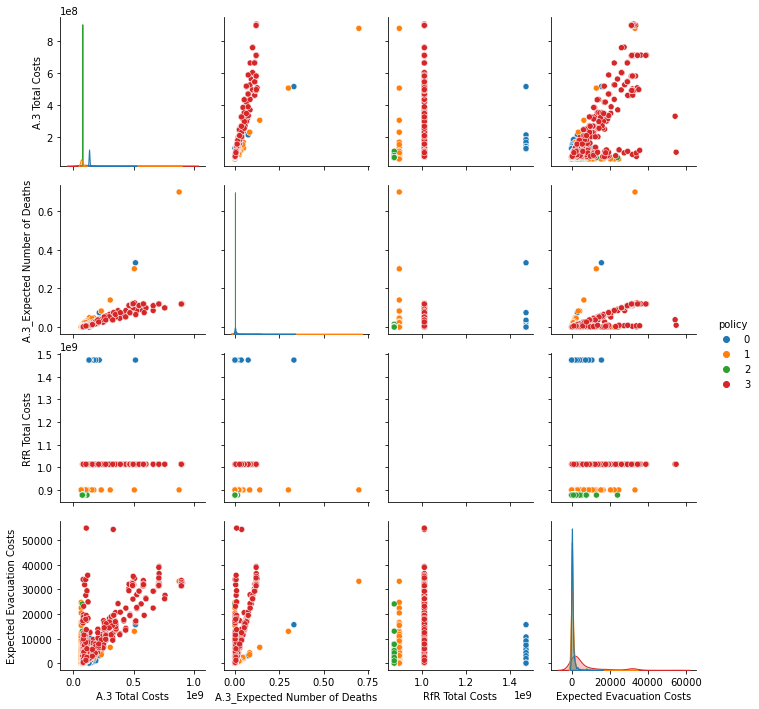

In [47]:
sns.pairplot(A_3data, hue='policy', vars=['A.3 Total Costs', 'A.3_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])
plt.show()

In [51]:
outcomes

{'A.1 Total Costs': array([8.52643608e+07, 8.52643608e+07, 8.52643608e+07, ...,
        2.26339325e+08, 2.26339325e+08, 2.26339325e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2 Total Costs': array([3.15518466e+08, 2.01701605e+08, 1.94055153e+08, ...,
        3.76260891e+08, 3.76260891e+08, 3.76260891e+08]),
 'A.2_Expected Number of Deaths': array([0.03760874, 0.00345576, 0.00094634, ..., 0.        , 0.        ,
        0.        ]),
 'A.3 Total Costs': array([1.30615580e+08, 1.30615580e+08, 1.30615580e+08, ...,
        8.22060871e+07, 1.04776487e+08, 2.10769959e+08]),
 'A.3_Expected Number of Deaths': array([0.        , 0.        , 0.        , ..., 0.00109095, 0.00557934,
        0.02616899]),
 'A.4 Total Costs': array([50926482.34608282, 50926482.34608282, 50926482.34608282, ...,
        29133320.9545623 , 29133320.9545623 , 49381331.42774807]),
 'A.4_Expected Number of Deaths': array([0.        , 0.        , 0.        , ..., 0.        , 0.      

In [50]:
data

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,8.526436e+07,0.0,3.155185e+08,0.037609,1.306156e+08,0.000000,5.092648e+07,0.000000,1.345228e+08,0.000000,1.474700e+09,3321.546648,0
1,8.526436e+07,0.0,2.017016e+08,0.003456,1.306156e+08,0.000000,5.092648e+07,0.000000,1.345228e+08,0.000000,1.474700e+09,267.013880,0
2,8.526436e+07,0.0,1.940552e+08,0.000946,1.306156e+08,0.000000,5.092648e+07,0.000000,1.345228e+08,0.000000,1.474700e+09,70.358044,0
3,8.526436e+07,0.0,1.996967e+08,0.003548,1.306156e+08,0.000000,5.092648e+07,0.000000,1.625558e+08,0.010922,1.474700e+09,1349.818074,0
4,8.526436e+07,0.0,1.931065e+08,0.000958,1.306156e+08,0.000000,5.092648e+07,0.000000,1.345228e+08,0.000000,1.474700e+09,70.691172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2.263393e+08,0.0,3.771401e+08,0.000079,1.127972e+08,0.005606,2.913332e+07,0.000000,1.079593e+08,0.000000,1.012800e+09,1192.324779,3
3996,2.263393e+08,0.0,3.762609e+08,0.000000,1.124659e+08,0.005517,2.986699e+07,0.000035,1.248432e+08,0.002004,1.012800e+09,2332.337724,3
3997,2.263393e+08,0.0,3.762609e+08,0.000000,8.220609e+07,0.001091,2.913332e+07,0.000000,1.100419e+08,0.000174,1.012800e+09,320.333594,3
3998,2.263393e+08,0.0,3.762609e+08,0.000000,1.047765e+08,0.005579,2.913332e+07,0.000000,1.079593e+08,0.000000,1.012800e+09,1156.599323,3


In [52]:
worst50 = sorted(outcomes['A.3_Expected Number of Deaths'])[-50:]
# worst = worst10[-1:][0]
# print(worst)
worst50

[0.11925123314681305,
 0.11925551417126865,
 0.11925899456977923,
 0.11926136452071137,
 0.11926743065145606,
 0.11935869534487728,
 0.119370237377984,
 0.11937139510102057,
 0.11937310107796975,
 0.11937729289267235,
 0.11937814969901953,
 0.11937902561686864,
 0.1193915508801176,
 0.1193915508801176,
 0.1193915508801176,
 0.11940421745097352,
 0.11940421745097352,
 0.11941220523374194,
 0.1194367793422923,
 0.1194393812611457,
 0.11950787710938804,
 0.11955383047765519,
 0.11957773817086592,
 0.11957913045999513,
 0.11957913045999513,
 0.11957913045999513,
 0.11963355800180372,
 0.11963619041579104,
 0.11964700073746157,
 0.11965025085919087,
 0.11965025085919087,
 0.119771771357737,
 0.11984770209137699,
 0.11986114632254788,
 0.11991715369228248,
 0.11997771941098692,
 0.120022500260758,
 0.12003092851548439,
 0.12003393342852797,
 0.12003852850505384,
 0.12008376001284574,
 0.12047711149491075,
 0.12048513320722383,
 0.1211636715985021,
 0.12168097304313596,
 0.12488846780122018,


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4000 points remaining, containing 49 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0035, coverage: 0.2857142857142857, density: 1.0 restricted_dimensions: 8


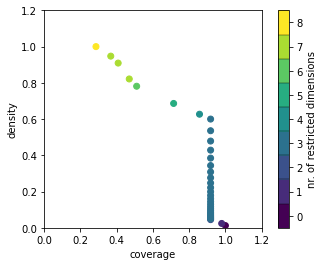

In [53]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['A.3_Expected Number of Deaths'] > worst50[0] 

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1, mass_min=0.001)
box = prim_alg.find_box()

box.show_tradeoff()
plt.show()

In [11]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

In [12]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 210 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 270 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
